In [1]:
import numpy as np
from matplotlib import pyplot as pp
from sklearn import linear_model, datasets

In [2]:
lin=datasets.load_linnerud()
lin

{'DESCR': 'Linnerrud dataset\n=================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 20\n    :Number of Attributes: 3\n    :Missing Attribute Values: None\n\nThe Linnerud dataset constains two small dataset:\n\n- *exercise*: A list containing the following components: exercise data with\n  20 observations on 3 exercise variables: Weight, Waist and Pulse.\n\n- *physiological*: Data frame with 20 observations on 3 physiological variables:\n   Chins, Situps and Jumps.\n\nReferences\n----------\n  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.\n',
 'data': array([[   5.,  162.,   60.],
        [   2.,  110.,   60.],
        [  12.,  101.,  101.],
        [  12.,  105.,   37.],
        [  13.,  155.,   58.],
        [   4.,  101.,   42.],
        [   8.,  101.,   38.],
        [   6.,  125.,   40.],
        [  15.,  200.,   40.],
        [  17.,  251.,  250.],
        [  17.,  120.,   38.],
        [  13.,  210.,  11

In [21]:
x=lin.data[:,:2]
y=lin.target[:,-1]
h=0.02 #stepsize
print(x)
print(y)

[[   5.  162.]
 [   2.  110.]
 [  12.  101.]
 [  12.  105.]
 [  13.  155.]
 [   4.  101.]
 [   8.  101.]
 [   6.  125.]
 [  15.  200.]
 [  17.  251.]
 [  17.  120.]
 [  13.  210.]
 [  14.  215.]
 [   1.   50.]
 [   6.   70.]
 [  12.  210.]
 [   4.   60.]
 [  11.  230.]
 [  15.  225.]
 [   2.  110.]]
[ 50.  52.  58.  62.  46.  56.  56.  60.  74.  56.  50.  52.  64.  50.  46.
  62.  54.  52.  54.  68.]


In [22]:
reg = linear_model.LogisticRegression()
reg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [30]:
x_min, x_max = x[:, 0].min() - .5, x[:, 0].max() + .5
y_min, y_max = x[:, 1].min() - .5, x[:, 1].max() + .5
print(x_min,x_max)
print(y_min,y_max)

0.5 17.5
49.5 251.5


In [32]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
print(xx,yy)
print(z)

[[  0.5    0.52   0.54 ...,  17.44  17.46  17.48]
 [  0.5    0.52   0.54 ...,  17.44  17.46  17.48]
 [  0.5    0.52   0.54 ...,  17.44  17.46  17.48]
 ..., 
 [  0.5    0.52   0.54 ...,  17.44  17.46  17.48]
 [  0.5    0.52   0.54 ...,  17.44  17.46  17.48]
 [  0.5    0.52   0.54 ...,  17.44  17.46  17.48]] [[  49.5    49.5    49.5  ...,   49.5    49.5    49.5 ]
 [  49.52   49.52   49.52 ...,   49.52   49.52   49.52]
 [  49.54   49.54   49.54 ...,   49.54   49.54   49.54]
 ..., 
 [ 251.44  251.44  251.44 ...,  251.44  251.44  251.44]
 [ 251.46  251.46  251.46 ...,  251.46  251.46  251.46]
 [ 251.48  251.48  251.48 ...,  251.48  251.48  251.48]]
[ 68.  68.  68. ...,  56.  56.  56.]


In [33]:
# Put the result into a color plot
z = z.reshape(xx.shape)
z

array([[ 68.,  68.,  68., ...,  58.,  58.,  58.],
       [ 68.,  68.,  68., ...,  58.,  58.,  58.],
       [ 68.,  68.,  68., ...,  58.,  58.,  58.],
       ..., 
       [ 52.,  52.,  52., ...,  56.,  56.,  56.],
       [ 52.,  52.,  52., ...,  56.,  56.,  56.],
       [ 52.,  52.,  52., ...,  56.,  56.,  56.]])

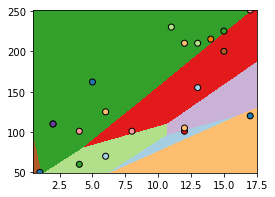

In [36]:
pp.figure(1, figsize=(4, 3))
pp.pcolormesh(xx, yy, z, cmap=pp.cm.Paired)

pp.scatter(x[:, 0], x[:, 1],c=y, edgecolors='k', cmap=pp.cm.Paired)


pp.xlim(xx.min(), xx.max())
pp.ylim(yy.min(), yy.max())


pp.show()